In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import networkx as nx

sns.set_style("ticks")
# sns.set(font_scale=1.5)

In [16]:
import os
# os.chdir('../')
os.getcwd()

'C:\\Users\\isvandroffelaa\\Documents\\model\\coarsening\\panchamy'

In [17]:
from main_create_network import city_graph
from cut_graph_to_boundaries import cut_graph

In [20]:
run_betweenness_centrality = True

In [ ]:
if run_betweenness_centrality:
    betweenness_centralities = {}
    for city in ['Amsterdam', 'Utrecht', 'Manhattan', 'Winterswijk', 'Rotterdam']:
        G, _, _ = city_graph(city, 0)
        if city != 'Amsterdam':
            G = cut_graph(G, city)
        betweenness_centrality = nx.edge_betweenness_centrality(G, normalized=True, weight='travel_time')
        with open(f"networks/betweenness_centrality_{city}.pkl", 'wb') as f:
            pickle.dump(betweenness_centrality, f)
        betweenness_centralities[city] = list(betweenness_centrality.values())
else:
    betweenness_centralities = {}
    for city in ['Utrecht', 'Manhattan', 'Winterswijk', 'Rotterdam', 'Amsterdam']:
        with open(f'networks/betweenness_centrality_{city}.pkl', 'rb') as f:
            betweenness_centrality = pickle.load(f)
        betweenness_centralities[city] = list(betweenness_centrality.values())

In [6]:
betweenness_centrality

{(34820323, 5044833748, 0): 0.0005167833205216382,
 (5044833748, 34820323, 0): 0.0005178622001051908,
 (5044833748, 44522408, 0): 0.0010330272012515002,
 (44522408, 5044833743, 0): 3.101778802713382e-05,
 (44522408, 44636200, 0): 0.0005057248047902254,
 (44522408, 44523846, 0): 0.002536445900931882,
 (44307032, 44353900, 0): 0.0005167833205216382,
 (44353900, 44405728, 0): 0.0002583916602608191,
 (44353900, 44424610, 0): 0.0007746355409906812,
 (44353900, 44307032, 0): 0.0005178622001051908,
 (44405728, 44353900, 0): 0.00022386751358713977,
 (44405728, 44407231, 0): 6.877857345147065e-05,
 (44405728, 44407267, 0): 0.0007053175277474343,
 (44424610, 44426076, 0): 0.0002977707650604847,
 (44424610, 44353900, 0): 0.0008113174468314655,
 (44424610, 44438489, 0): 0.0015104314169734731,
 (44407231, 44405728, 0): 6.877857345147065e-05,
 (44407231, 44407267, 0): 0.0008984369732033283,
 (44407231, 8734246199, 0): 0.0005863710536607733,
 (44407267, 44398479, 0): 0.0019824412347776836,
 (44407267

<Axes: ylabel='Count'>

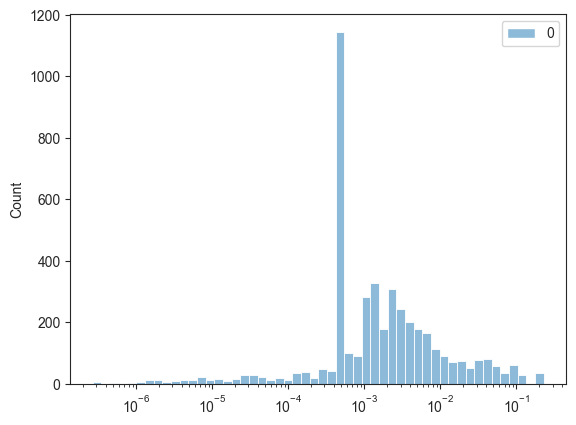

In [8]:
sns.histplot(betweenness_centrality.values(), log_scale=True)